In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("study_performance.csv") # Veri setini okuma
df.head()                                 # Veri setinin ilk 5 satırını görme

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Veri Setine Genel Bakış

In [62]:
df.shape # Veri setinin kaç kolon ve satırdan oluştuğuna bakma

(1000, 8)

In [63]:
df.index # index özellikleri

RangeIndex(start=0, stop=1000, step=1)

In [64]:
df.columns # Kolonları(Değişkenleri) görme

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [65]:
df.dtypes # Değişkenlerin tipleri

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [66]:
df.info() # Veri seti bilgilerine genel bakış

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [67]:
# Veri setinin alındığı kaynakta "race_ethnicity" değişkenine ait değerler ile ilgili bir açıklama olmadığından silindi.
df.drop(["race_ethnicity"], axis=1, inplace = True)

### Eksik Veri Kontrolü

In [68]:
df.isnull().sum() # Eksik veri yok

gender                         0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

### Ordinal Değişkenleri Sayısal Değere Dönüştürme
- parental_level_of_education ve lunch değişkenler için uygulanmıştır.
- Önem derecesi sayılar ile doğru orantılıdır. Başlangıç noktası 0'dır.

In [69]:
from sklearn.preprocessing import OrdinalEncoder 

##### Eğitim Seviyeleri Açıklaması:
- master's degree: Yüksek Lisans = 5
- bachelor's degree: Lisans = 4
- associate's degree: Ön Lisans = 3
- some college: Üniversite Terk(Yarıda bırakmış veya belirli bir süre eğitim almış) = 2
- high school: Lise = 1
- some high school: Lise Terk(Yarıda bırakmış veya belirli bir süre eğitim almış) = 0

In [70]:
df.parental_level_of_education.unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [71]:
# Eğitim seviyeleri önem sırasına göre listede tutulmuştur.
egitim_sıralaması = [["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]]
egitim_sıralaması 

[['some high school',
  'high school',
  'some college',
  "associate's degree",
  "bachelor's degree",
  "master's degree"]]

In [72]:
# OrdinalEncoder'ın çalıştırılması
egitim_ol = OrdinalEncoder(categories=egitim_sıralaması) 

In [73]:
# Değerlerin dönüşümü
df["parental_level_of_education"] = egitim_ol.fit_transform(df[["parental_level_of_education"]])

In [74]:
# Değerlerin saysal hali
df["parental_level_of_education"]

0      4.0
1      2.0
2      5.0
3      3.0
4      2.0
      ... 
995    5.0
996    1.0
997    1.0
998    2.0
999    2.0
Name: parental_level_of_education, Length: 1000, dtype: float64

##### Yemek Sıralaması
- free/reduced = 0
- standart = 1

In [75]:
df["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

In [76]:
# Yemek çeşitleri önem sırasına göre listede tutulmuştur.
yemek_cesitleri_siralamasi = [["free/reduced", "standard"]]
yemek_cesitleri_siralamasi

[['free/reduced', 'standard']]

In [77]:
# OrdinalEncoder'ın çalıştırılması
yemek_ol = OrdinalEncoder(categories=yemek_cesitleri_siralamasi)

In [78]:
# Değerlerin dönüşümü
df["lunch"] = yemek_ol.fit_transform(df[["lunch"]])

In [79]:
# Değerlerin saysal hali
df["lunch"]

0      1.0
1      1.0
2      1.0
3      0.0
4      1.0
      ... 
995    1.0
996    0.0
997    0.0
998    1.0
999    0.0
Name: lunch, Length: 1000, dtype: float64

### Nominal Değerleri Sayısal Değere Dönüştürme
- gender ve test_preparation_course değişkenleri için uygulanmıştır.

In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
df["gender"].unique()

array(['female', 'male'], dtype=object)

In [82]:
# LabelEncoder'ın çalıştırılması
le = LabelEncoder()

In [83]:
# Yeni değerlerin eski değerlere atanması(Veri setini değiştirir.)
df["gender"] = le.fit_transform(df["gender"])

In [84]:
# 0 ve 1 olarak değiştirilmiş değişkenlerin karşılığı
le.inverse_transform([0,1]) # female = 0, male = 1

array(['female', 'male'], dtype=object)

In [85]:
# Yeni değerlerin eski değerlere atanması(Veri setini değiştirir.)
df["test_preparation_course"] = le.fit_transform(df["test_preparation_course"])

In [86]:
# 0 ve 1 olarak değiştirilmiş değişkenlerin karşılığı
le.inverse_transform([0,1]) # completed = 0, none = 1

array(['completed', 'none'], dtype=object)

In [87]:
# Veri setindeki tüm değişken(kolon) değerlerinin sayısal değere dönüşmüş hali
df

,gender,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,4.0,1.0,1,72,72,74
1,0,2.0,1.0,0,69,90,88
2,0,5.0,1.0,1,90,95,93
3,1,3.0,0.0,1,47,57,44
4,1,2.0,1.0,1,76,78,75
...,...,...,...,...,...,...,...
995,0,5.0,1.0,0,88,99,95
996,1,1.0,0.0,1,62,55,55
997,0,1.0,0.0,0,59,71,65
998,0,2.0,1.0,0,68,78,77


### Aykırı Değerleri Bulma ve Baskılama Yöntemi İle Çözme
- Baskılama yönetimi kullanılarak alt eşik değeri aşağısındaki değerler alt eşik değerine, üst eşik yukarısında kalan değerler ise üst limit değerine eşitlenir. Böylelikle veri setinden herhangi bir gözlem değeri silinmemiş olur.
- NOT: Aykırı değerleri bulmak için fonksiyon kullanmak daha doğrudur çünkü birçok değişken için yapılmalıdır. Fakat bu çalışmada temel düzeyde ele alınmıştır.

#### math_score Aykrı Değerler

<Axes: xlabel='math_score'>

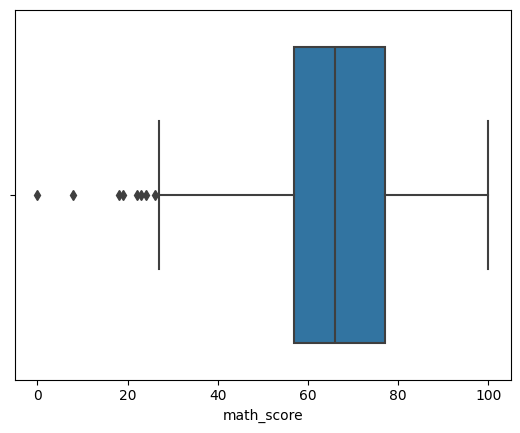

In [88]:
# Kutu grafiği kullanarak aykırı değerleri gözlemleme
sns.boxplot(x = df["math_score"])

In [89]:
q1 = df["math_score"].quantile(0.25) # 1.çeyrek değeri
q3 = df["math_score"].quantile(0.75) # 3.çeyrek değeri

iqr = q3 - q1 # IQR değeri

alt_limit = q1 - 1.5 * iqr # alt limit/eşik
ust_limit = q3 + 1.5 * iqr # üst limit/eşik

print(f"Alt Eşik: {alt_limit}")
print(f"Üst Eşik: {ust_limit}")

Alt Eşik: 27.0
Üst Eşik: 107.0


In [90]:
# Aykırı değerleri gözlemleme
aykiri_math_score = df.loc[(df["math_score"] < alt_limit) | (df["math_score"] > ust_limit), "math_score"]
aykiri_math_score

17     18
59      0
145    22
338    24
466    26
787    19
842    23
980     8
Name: math_score, dtype: int64

In [91]:
# Baskılama yöntemi kullanılarak üst limiti aşan değerlere üst limit değeri ile değiştirildi.
df.loc[df["math_score"] > ust_limit, "math_score"] = ust_limit

In [92]:
# Baskılama yöntemi kullanılarak alt limit aşağısındaki değerler alt limit değeri ile değiştirildi.
df.loc[df["math_score"] < alt_limit, "math_score"] = alt_limit

In [93]:
df.iloc[842, 4:5]

math_score    27.0
Name: 842, dtype: float64

#### reading_score Aykrı Değerler

<Axes: xlabel='reading_score'>

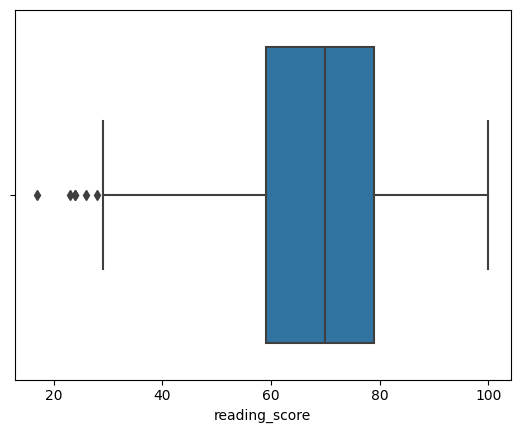

In [94]:
sns.boxplot(x = df["reading_score"])

In [95]:
q1 = df["reading_score"].quantile(0.25)
q3 = df["reading_score"].quantile(0.75)

iqr = q3 - q1

alt_limit = q1 - 1.5 * iqr
ust_limit = q3 + 1.5 * iqr

print(f"Alt Eşik: {alt_limit}")
print(f"Üst Eşik: {ust_limit}")

Alt Eşik: 29.0
Üst Eşik: 109.0


In [96]:
aykiri_reading_score = df.loc[(df["reading_score"] < alt_limit) | (df["reading_score"] > ust_limit), "reading_score"]
aykiri_reading_score

59     17
76     26
211    28
327    23
596    24
980    24
Name: reading_score, dtype: int64

In [97]:
df.loc[df["reading_score"] > ust_limit, "reading_score"] = ust_limit

In [98]:
df.loc[df["reading_score"] < alt_limit, "reading_score"] = alt_limit

In [99]:
df.iloc[211, 5:6]

reading_score    29.0
Name: 211, dtype: float64

#### writing_score Aykrı Değerler

<Axes: xlabel='writing_score'>

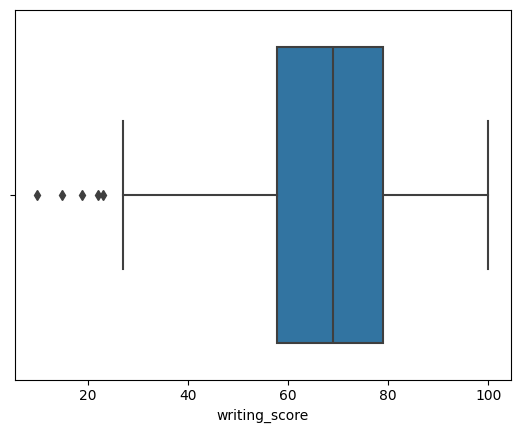

In [100]:
sns.boxplot(x=df["writing_score"])

In [101]:
q1 = df["writing_score"].quantile(0.25)
q3 = df["writing_score"].quantile(0.75)

iqr = q3 - q1

alt_limit = q1 - 1.5 * iqr
ust_limit = q3 + 1.5 * iqr

print(f"Alt Eşik: {alt_limit}")
print(f"Üst Eşik: {ust_limit}")

Alt Eşik: 25.875
Üst Eşik: 110.875


In [102]:
aykiri_writing_score = df.loc[(df["writing_score"] > ust_limit) | (df["writing_score"] < alt_limit), "writing_score"]
aykiri_writing_score

59     10
76     22
327    19
596    15
980    23
Name: writing_score, dtype: int64

In [103]:
df.loc[df["writing_score"] > ust_limit, "writing_score"] = ust_limit

In [104]:
df.loc[df["writing_score"] < alt_limit, "writing_score"] = alt_limit

In [105]:
# Veri setinin aykırı değerlerden arınmış hali
df 

,gender,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,4.0,1.0,1,72,72,74.0
1,0,2.0,1.0,0,69,90,88.0
2,0,5.0,1.0,1,90,95,93.0
3,1,3.0,0.0,1,47,57,44.0
4,1,2.0,1.0,1,76,78,75.0
...,...,...,...,...,...,...,...
995,0,5.0,1.0,0,88,99,95.0
996,1,1.0,0.0,1,62,55,55.0
997,0,1.0,0.0,0,59,71,65.0
998,0,2.0,1.0,0,68,78,77.0


### Model Kurma İçin Hazırlık

(array([ 22.,  34.,  62., 130., 179., 182., 176., 112.,  68.,  35.]),
 array([ 27. ,  34.3,  41.6,  48.9,  56.2,  63.5,  70.8,  78.1,  85.4,
         92.7, 100. ]),
 <BarContainer object of 10 artists>)

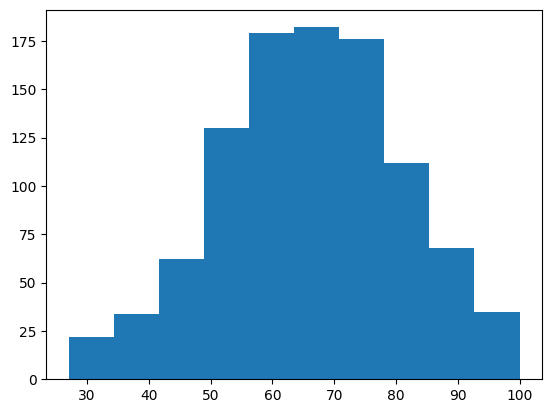

In [106]:
# Bağımlı değişken(tahmin edilecek) değerlerin dağılımına göre hangi modelin kullanılacağını belirlemek.
# Bu dağılım göre liner regresyon kullanmak doğru olur.
plt.hist(df["math_score"])

In [107]:
# Değişkenler arasındaki korelasyona bakma
# Korelasyon sonuçlarına göre bazı değişkenler çıkartılabilir fakat bu çalışmada herhangi bir değişken çıkartılmayacaktır.
df.corr()["math_score"].sort_values()

test_preparation_course       -0.177323
parental_level_of_education    0.157127
gender                         0.165776
lunch                          0.350788
writing_score                  0.799954
reading_score                  0.815727
math_score                     1.000000
Name: math_score, dtype: float64

In [108]:
# 1.Değişkenlerin eğitim ve test kümesi olarak ayrılması için import edildi.
# 2.Fakat öncesinde değişkenler bağımlı ve bağımsız değişken olarak ayrılmalı.
# 3.Sonrasında bağımlı ve bağımsız değişkenler eğitim(train) ve test olarak ayrılmalı.
from sklearn.model_selection import train_test_split

In [109]:
# İşlemlerin daha hızlı ve kolay yapılması için değerler "values" ile numpy dizisi(array)'ne eklendi.
x = df.drop("math_score", axis=1).values # Bağımsız değişkenler
y = df["math_score"].values # Bağımlı Değişken

In [110]:
x

array([[ 0.,  4.,  1.,  1., 72., 74.],
       [ 0.,  2.,  1.,  0., 90., 88.],
       [ 0.,  5.,  1.,  1., 95., 93.],
       ...,
       [ 0.,  1.,  0.,  0., 71., 65.],
       [ 0.,  2.,  1.,  0., 78., 77.],
       [ 0.,  2.,  0.,  1., 86., 86.]])

In [111]:
y

array([ 72,  69,  90,  47,  76,  71,  88,  40,  64,  38,  58,  40,  65,
        78,  50,  69,  88,  27,  46,  54,  66,  65,  44,  69,  74,  73,
        69,  67,  70,  62,  69,  63,  56,  40,  97,  81,  74,  50,  75,
        57,  55,  58,  53,  59,  50,  65,  55,  66,  57,  82,  53,  77,
        53,  88,  71,  33,  82,  52,  58,  27,  79,  39,  62,  69,  59,
        67,  45,  60,  61,  39,  58,  63,  41,  61,  49,  44,  30,  80,
        61,  62,  47,  49,  50,  72,  42,  73,  76,  71,  58,  73,  65,
        27,  71,  43,  79,  78,  65,  63,  58,  65,  79,  68,  85,  60,
        98,  58,  87,  66,  52,  70,  77,  62,  54,  51,  99,  84,  75,
        78,  51,  55,  79,  91,  88,  63,  83,  87,  72,  65,  82,  51,
        89,  53,  87,  75,  74,  58,  51,  70,  59,  71,  76,  59,  42,
        57,  88,  27,  88,  73,  68, 100,  62,  77,  59,  54,  62,  70,
        66,  60,  61,  66,  82,  75,  49,  52,  81,  96,  53,  58,  68,
        67,  72,  94,  79,  63,  43,  81,  46,  71,  52,  97,  6

In [112]:
# Bağımlı ve bağımsız değişkenleri eğitim(train) ve test olarak ayırma
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33,random_state=0)

### Sayısal değerleri 0-1 arasında temsil etme

In [113]:
# Değerlerin 0-1 arasında temsil etmek için
from sklearn.preprocessing import MinMaxScaler

In [114]:
scaler = MinMaxScaler()

In [115]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### MODEL KURMA

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
lin_reg = LinearRegression()

In [118]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [119]:
tahmin = lin_reg.predict(x_test)
tahmin # y_test ile karşılaştırılmalı

array([63.24491367, 75.59073471, 49.84284966, 67.26480029, 70.45128203,
       74.21175768, 66.00448111, 49.17233616, 85.99182407, 43.28333993,
       44.9981567 , 60.42039661, 81.82240793, 86.16763969, 44.96213603,
       34.22746229, 57.69620787, 76.9416943 , 49.15467498, 82.21206072,
       56.35322155, 47.6189886 , 72.01656928, 64.05637832, 47.94063331,
       65.73486179, 62.64078174, 50.24907426, 57.99428235, 78.71366883,
       74.72307046, 91.05073987, 86.03978442, 55.21500976, 44.41611647,
       88.52098253, 91.96620333, 58.65860403, 68.81162323, 69.70272303,
       72.26544257, 59.5310581 , 74.55269008, 68.45939311, 73.65763008,
       51.13841276, 83.49472607, 54.37295969, 76.77657752, 52.40719572,
       42.61422844, 64.12340186, 42.87027808, 62.88281778, 39.15942455,
       66.22787141, 47.06421904, 67.66895097, 79.82544305, 54.17709633,
       70.20826145, 70.38773441, 41.97917828, 77.88580403, 71.30364527,
       67.5622328 , 76.90603292, 48.50053526, 61.35733975, 55.31

Tahmin
- Verilen bağımsız değişken değerlerine göre bağımlı değişken tahmin edilmiştir.

In [120]:
lin_reg.predict([[0, 4.0, 1.0, 1, 72, 74.0]])

array([5281.23553799])

In [121]:
lin_reg.predict([[0,2,1,0,78,77]])

array([5564.88872095])

### Model Değerlendirme
- r2_score: Modelin doğruluğu için yüksek bir değer beklenir. 0 ile 1 aralığında değer alabilir.
- mean_absolute_error: Modelin doğruluğu için düşük bir değer beklenir. 0 ile sonsuz aralığında değer alabilir.
- mean_squared_error: Modelin doğruluğu için düşük bir değer beklenir. 0 ile sonsuz aralığında değer alabilir.

In [127]:
# Modelin Başarısını Ölçme
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error

In [128]:
r2_score(y_test, tahmin)

0.847978261629213

In [129]:
mean_absolute_error(y_test, tahmin)

4.382555886120624

In [130]:
mean_squared_error(y_test, tahmin)

31.385116826640648